## Numpy

In [8]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [9]:
import numpy as np
import random
import time

def standard_approach():
    random_list = [random.random() for _ in range(10000)]
    for i in range(len(random_list)):
        random_list[i] += 1


%timeit -n 100 standard_approach()


2.15 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
def numpy_approach():
    np_array = np.random.rand(10000)
    np_array += 1
    
%timeit -n 100 numpy_approach()

113 µs ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [11]:
from math import sin, cos
import random
import numpy as np


def loop_func():
    random_list = [random.random() for _ in range(10000)]
    result = []
    for x in random_list:
        result.append(sin(x) + cos(x))
    return result

%timeit -n 100
loop_func()

[1.3983861929606216,
 1.400050879517177,
 1.343798085455971,
 1.4136643802963191,
 1.4136056689115581,
 1.4140644007495808,
 1.3482884190312379,
 1.4050957642722182,
 1.3715705971319125,
 1.4128263890036517,
 1.0184708368331865,
 1.4134374979443192,
 1.2609187448703327,
 1.0956076204434009,
 1.3926697774449113,
 1.4113178665977448,
 1.3793271082816747,
 1.3936933456034954,
 1.1329593261242052,
 1.3497439471038613,
 1.2803572788833255,
 1.1307467375759896,
 1.1690999540385203,
 1.4065780543568962,
 1.404279597544676,
 1.1736906210244884,
 1.3246909134929539,
 1.0702746523242666,
 1.1259924461922552,
 1.3841663162488245,
 1.182887026292409,
 1.1350702102585306,
 1.0602852519280823,
 1.3245067975258067,
 1.1392759701698822,
 1.4069739648375954,
 1.3210099688876862,
 1.3866701750179509,
 1.3830284838467226,
 1.3912769010085486,
 1.3400500289829216,
 1.412455778152807,
 1.3950874045746127,
 1.277025127336116,
 1.349154937561306,
 1.3154039882815347,
 1.3297280759421513,
 1.3915600021060581,

In [12]:
def numpy_func():
    np_array = np.random.rand(10000)
    result = np.sin(np_array) + np.cos(np_array)
    return result

%timeit -n 100
numpy_func()

array([1.20130458, 1.08930977, 1.39998946, ..., 1.25471555, 1.26112406,
       1.11623238])

### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [13]:
def cube_sum(x):
    return sum([y ** 3 for y in x])

x = list(range(10000))
%timeit cube_sum(x)

def almost_variance(x):
    m = sum(x) / len(x)
    return sum([(elem - m) ** 4 for elem in x]) / len(x)

x = list(range(10000))
%timeit almost_variance(x)

2.62 ms ± 14 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.34 ms ± 89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [14]:
import numpy as np
tab = np.arange(1, 11)

result_multiply = np.outer(tab, tab)
result_dot = tab.dot(tab.reshape(10,1))

print(result_multiply)
print(result_dot)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[385]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [15]:
import numpy as np

points = np.random.rand(10, 5)
r1 =points.reshape(1, 10, 5)
r2 = points.reshape(10, 1, 5)

diff = r2 - r1
square= np.square(diff)
result = square.sum(axis=2)

print(r1, '\n')


[[[0.89955723 0.49902602 0.29551967 0.46726838 0.58086469]
  [0.99373594 0.1974472  0.40677659 0.75796143 0.83370214]
  [0.29441126 0.69240799 0.06882742 0.79159107 0.18178904]
  [0.97305495 0.91153691 0.58682719 0.98490598 0.0463442 ]
  [0.01074235 0.69702682 0.9290839  0.5739188  0.65836578]
  [0.15815956 0.81447331 0.31858164 0.50044917 0.91188476]
  [0.47645583 0.23949809 0.03775677 0.6987255  0.96706014]
  [0.59567676 0.79470801 0.75322939 0.95362427 0.1367791 ]
  [0.74836686 0.85899394 0.04752916 0.92625717 0.68947009]
  [0.28198763 0.54818396 0.50485145 0.22513532 0.74173395]]] 



In [16]:
print(r2, '\n')

[[[0.89955723 0.49902602 0.29551967 0.46726838 0.58086469]]

 [[0.99373594 0.1974472  0.40677659 0.75796143 0.83370214]]

 [[0.29441126 0.69240799 0.06882742 0.79159107 0.18178904]]

 [[0.97305495 0.91153691 0.58682719 0.98490598 0.0463442 ]]

 [[0.01074235 0.69702682 0.9290839  0.5739188  0.65836578]]

 [[0.15815956 0.81447331 0.31858164 0.50044917 0.91188476]]

 [[0.47645583 0.23949809 0.03775677 0.6987255  0.96706014]]

 [[0.59567676 0.79470801 0.75322939 0.95362427 0.1367791 ]]

 [[0.74836686 0.85899394 0.04752916 0.92625717 0.68947009]]

 [[0.28198763 0.54818396 0.50485145 0.22513532 0.74173395]]] 



In [17]:
print(result)

[[0.         0.26062674 0.71943419 0.81408806 1.24798057 0.76038462
  0.51553058 0.82302343 0.43640058 0.51213584]
 [0.26062674 0.         1.27437246 1.21420638 1.55327564 1.15911255
  0.42681586 1.15918679 0.67603514 0.93158242]
 [0.71943419 1.27437246 0.         0.83261446 1.09503721 0.71364502
  0.86450771 0.5979129  0.51015519 0.84548231]
 [0.81408806 1.21420638 0.83261446 0.         1.63268065 1.72929038
  1.92934229 0.19291    0.76113847 1.67713778]
 [1.24798057 1.55327564 1.09503721 1.63268065 0.         0.47790819
  1.33155455 0.7988436  1.47257184 0.40430154]
 [0.76038462 1.15911255 0.71364502 1.72929038 0.47790819 0.
  0.55312945 1.1868871  0.65457693 0.22568888]
 [0.51553058 0.42681586 0.86450771 1.92934229 1.33155455 0.55312945
  0.         1.58871275 0.58663311 0.62634184]
 [0.82302343 1.15918679 0.5979129  0.19291    0.7988436  1.1868871
  1.58871275 0.         0.83167606 1.1175331 ]
 [0.43640058 0.67603514 0.51015519 0.76113847 1.47257184 0.65457693
  0.58663311 0.831676

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [18]:

def whiten(x):
    return((x-np.mean(x,axis=0))/np.std(x,axis=0))

array= np.array([[0,1],[2,3],[4,5],[6,7],[8,9]])
print(whiten(array))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [19]:
import numpy as np

def closest(x, A):
    index = np.argmin(np.abs(A - x))
    return A[index]

result = closest(1.5, np.array([1, -4, 3]))
print(result)

1


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [20]:
import numpy as np

def poly(a, x):
    return np.power(np.repeat(a, len(x)), np.arange(0,len(x))).sum()

print(poly(3,[1,1,1]))  

13


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

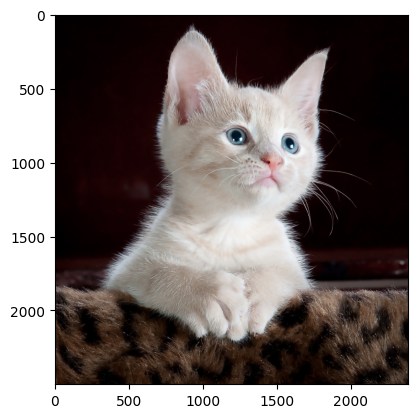

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('kotek.jpg')
plt.imshow(img)

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

/tmp/ipykernel_29929/120178012.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('kotek.jpg')


(-0.5, 2391.5, 2499.5, -0.5)

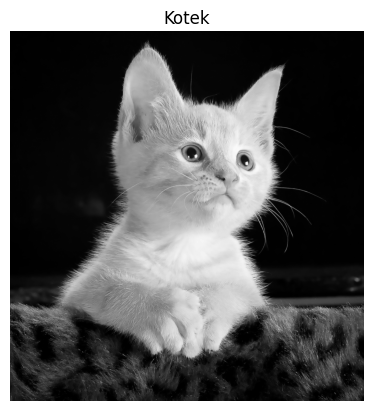

In [22]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_grayscale(image):
    
    gray_image = np.dot(image[..., :3], [0.2126, 0.7152, 0.0722])
    return gray_image

img = imageio.imread('kotek.jpg')
gray_img = rgb_to_grayscale(img)

plt.imshow(gray_img, cmap='gray')
plt.title('Kotek')
plt.axis('off')  


### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [23]:
import numpy as np

def linear_interpolation(x1, x2, lambdas):
    return np.outer(lambdas, x1) + np.outer(1 - lambdas, x2)

point1 = np.array([1, 2])
point2 = np.array([5, 9])
lambdas = np.linspace(0, 1, 10)


interpolated_points = linear_interpolation(point1, point2, lambdas)

print(interpolated_points)


[[5.         9.        ]
 [4.55555556 8.22222222]
 [4.11111111 7.44444444]
 [3.66666667 6.66666667]
 [3.22222222 5.88888889]
 [2.77777778 5.11111111]
 [2.33333333 4.33333333]
 [1.88888889 3.55555556]
 [1.44444444 2.77777778]
 [1.         2.        ]]
